In [59]:
import numpy
import keras.datasets
import keras.utils
from keras import backend as K
from keras.datasets import mnist
from keras.utils import np_utils

C:\Users\kuzhal\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [60]:
from keras.layers import Dense, Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [61]:
from keras.models import Sequential
import pandas as pd

model = Sequential()

In [62]:
K.set_image_data_format('channels_last')
numpy.random.seed(0)

In [63]:
X = pd.read_csv('F:/studies/6 semester/6 DATA MINING/train.csv')
test = pd.read_csv('F:/studies/6 semester/6 DATA MINING/test.csv')

y = X["label"]
X.drop(["label"], inplace = True, axis = 1)

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2)

In [65]:
X_train = X_train.reshape(X_train.shape[0], 28, 28 , 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28 , 1)

In [66]:
import matplotlib.pyplot as plt
print("the number of training examples = %i" % X_train.shape[0])
print("the number of classes = %i" % len(numpy.unique(y_train)))
print("Dimension of images = {:d} x {:d}  ".format(X_train[1].shape[0],X_train[1].shape[1])  )

the number of training examples = 33600
the number of classes = 10
Dimension of images = 28 x 28  


The number of occuranc of each class in the dataset = {0: 3319, 1: 3723, 2: 3317, 3: 3488, 4: 3245, 5: 3039, 6: 3296, 7: 3502, 8: 3295, 9: 3376}  



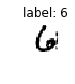

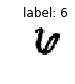

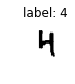

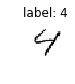

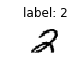

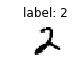

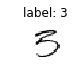

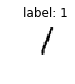

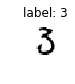

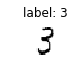

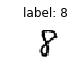

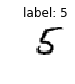

In [68]:
unique, count= numpy.unique(y_train, return_counts=True)
print("The number of occuranc of each class in the dataset = %s " % dict (zip(unique, count) ), "\n" )
 
images_and_labels = list(zip(X_train,  y_train))
for index, (image, label) in enumerate(images_and_labels[:12]):
    plt.subplot(5, 4, index + 1)
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('label: %i' % label )
    plt.show()

In [12]:
from keras.layers import Dropout
model.add(Conv2D(40, kernel_size=5, padding="same",input_shape=(28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


In [13]:
model.add(Conv2D(70, kernel_size=3, padding="same", activation = 'relu'))
model.add(Conv2D(500, kernel_size=3, padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(1024, kernel_size=3, padding="valid", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


In [14]:
from keras.layers.core import Activation

model.add(Flatten())
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.1))
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.1))
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.3))

model.add(Dense(10))
model.add(Activation("softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [15]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

from keras.preprocessing.image import ImageDataGenerator
X_train2 = numpy.array(X_train, copy=True) 
y_train2 = numpy.array(y_train, copy=True) 

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    )

datagen.fit(X_train)

print(type(X_train2))
print(type(X_train))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [17]:
result_x  = numpy.concatenate((X_train, X_train2), axis=0)
result_y  = numpy.concatenate((y_train, y_train2), axis=0)


In [18]:
history = model.fit_generator(datagen.flow(result_x, result_y, batch_size=35),
                    steps_per_epoch=len(X_train) / 32, epochs = 12)

Epoch 1/12
1050/1050 [==============================] - 1794s 2s/step - loss: 0.3812 - acc: 0.8778
Epoch 2/12
1050/1050 [==============================] - 1821s 2s/step - loss: 0.1142 - acc: 0.9711
Epoch 3/12
1050/1050 [==============================] - 1922s 2s/step - loss: 0.0895 - acc: 0.9773
Epoch 4/12
1050/1050 [==============================] - 1983s 2s/step - loss: 0.0767 - acc: 0.9811
Epoch 5/12
1050/1050 [==============================] - 2107s 2s/step - loss: 0.0768 - acc: 0.9811
Epoch 6/12
1050/1050 [==============================] - 2105s 2s/step - loss: 0.0775 - acc: 0.9822
Epoch 7/12
1050/1050 [==============================] - 34236s 33s/step - loss: 0.0576 - acc: 0.9861
Epoch 8/12
1050/1050 [==============================] - 1927s 2s/step - loss: 0.0577 - acc: 0.9862
Epoch 9/12
1050/1050 [==============================] - 1880s 2s/step - loss: 0.0591 - acc: 0.9861
Epoch 10/12
1050/1050 [==============================] - 1812s 2s/step - loss: 0.0575 - acc: 0.9879
Epoch 1

In [19]:
# model.fit(X_train, y_train, epochs= 32 , batch_size=200, validation_split = 0.2)
scores = model.evaluate(X_test, y_test, verbose = 10 )
print ( scores )

[0.1637740207428078, 0.9894047619047619]


In [20]:
test_set = (test.values).reshape(-1, 28, 28 , 1).astype('float32')

res = model.predict(test_set)
res = numpy.argmax(res,axis = 1)
res = pd.Series(res, name="Label")
submission = pd.concat([pd.Series(range(1 ,28001) ,name = "ImageId"),   res],axis = 1)
submission.to_csv("cnn_mnist_datagen.csv",index=False)
submission.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [54]:
import pandas as pd
import numpy as np
X = pd.read_csv('F:/studies/6 semester/6 DATA MINING/train.csv')
test = pd.read_csv('F:/studies/6 semester/6 DATA MINING/test.csv')
X_train=np.array(test.iloc[7,])

In [55]:
train1 = X_train.reshape(28, 28)

In [56]:
train1.shape

(28, 28)

In [57]:
import matplotlib.pyplot as plt
import cv2

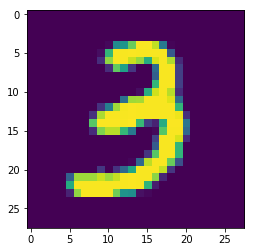

In [58]:
plt.imshow(train1)
plt.show()